# Code for Figure 4 part (a) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [11]:
scens1 = ['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']
vals = np.zeros((6, 5))
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        try:
            vals[i, j] = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel1.0_storage_stats_20211119.csv')['Storage Rate Result'].values[0]
        except:
            print('Zero for ', scen1, scen2)

In [12]:
vals[5, 4] = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel1.0_storage_stats_20211119.csv')['Storage Rate Result'].values[0]

In [13]:
vals

array([[ 8107.,  3313.,  2674.,  2747.,     0.],
       [21380., 12373.,  2679.,  2750.,     0.],
       [10496.,  5145.,  3104.,  3294.,     0.],
       [11069.,  6671.,  7635.,  5884.,     0.],
       [10492.,  5067.,  8251.,  3201.,     0.],
       [    0.,     0.,     0.,     0.,  5185.]])

In [35]:
pd.DataFrame(vals, index=['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'],
            columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BAU']).to_csv('MainPlotting/Tables/fig4a.csv')

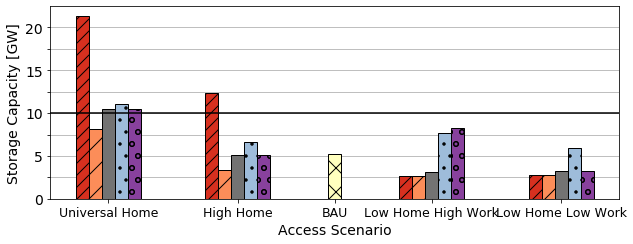

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'Uncontrolled', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
hatches = ['//', '/', '', '.', 'o']

axes.axhline(10, color='k')

axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12.5)
# axes.set_title('Min Storage Needed to Support 100% EVs', fontsize=12)
axes.set_ylabel('Storage Capacity [GW]', fontsize=14)
axes.set_xlabel('Access Scenario', fontsize=14)

axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, (1/1000)*vals[1, np.arange(0, 4)], 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, (1/1000)*vals[0, np.arange(0, 4)], 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1]) # note switched order of midnight and 9pm timers
axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, (1/1000)*vals[3, np.arange(0, 4)], 0.1, color=colors[3], label=control_labels[3], edgecolor='k', hatch=hatches[3])
axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, (1/1000)*vals[4, np.arange(0, 4)], 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
axes.bar(np.array([0, 1, 2.5, 3.5]), (1/1000)*vals[2, np.arange(0, 4)], 0.1, color=colors[2], edgecolor='k', label=control_labels[2], hatch=hatches[2])

axes.bar([1.75], (1/1000)*vals[5, 4], 0.1, color='#ffffbf', edgecolor='k', hatch='x', label='Business As Usual, Timers + Work Control')

edgecolors=[None, None, 'k', None, None]
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                             label=control_labels[i]) for i in range(len(control_labels))]
legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
axes.set_yticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20])
axes.set_yticklabels([0, '', 5, '', 10, '', 15, '', 20], fontsize=14)

plt.gca().set_axisbelow(True)        
plt.grid(axis='y', which='both')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4a.pdf', bbox_inches='tight')
plt.show()

# Stats

In [34]:
df = pd.DataFrame(vals, index=['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'],
            columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BAU'])

In [18]:
df

,UniversalHome,HighHome,LowHome_HighWork,LowHome_LowWork,BAU
_Timers12am_noWPcontrol,8107.0,3313.0,2674.0,2747.0,0.0
_Timers9pm_noWPcontrol,21380.0,12373.0,2679.0,2750.0,0.0
_TimersNone_noWPcontrol,10496.0,5145.0,3104.0,3294.0,0.0
_TimersNone_WPcontrol_minpeak,11069.0,6671.0,7635.0,5884.0,0.0
_TimersNone_WPcontrol_avgem,10492.0,5067.0,8251.0,3201.0,0.0
_TiemrsMixed_WPcontrol_minpeak,0.0,0.0,0.0,0.0,5185.0


In [27]:
print('Lowest:', (1/1000)*df[df>0].min().min())
print('Highest:', (1/1000)*df[df>0].max().max())
print('Ratio:', np.round(((1/1000)*df[df>0].max().max()) / ((1/1000)*df[df>0].min().min()), 2))

Lowest: 2.674
Highest: 21.38
Ratio: 8.0


In [29]:
print('Uncontrolled values:')
(1/1000)*df.loc['_TimersNone_noWPcontrol']

Uncontrolled values:


UniversalHome       10.496
HighHome             5.145
LowHome_HighWork     3.104
LowHome_LowWork      3.294
BAU                  0.000
Name: _TimersNone_noWPcontrol, dtype: float64

In [32]:
peaktotdemand = 1000*pd.read_csv('MainPlotting/Tables/fig3a_totaldemand.csv', index_col=0)
print('As fraction of peak total demand: ')
df.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork']  / peaktotdemand.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork']

As fraction of peak total demand: 


0.024039653035935565

In [42]:
print('Decrease switching from bau to low home high work uncontrolled: ')
np.round(df.loc['_TimersMixed_WPcontrol_minpeak', 'BAU'] / df.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork'], 2)

Decrease switching from bau to low home high work uncontrolled: 


1.67

In [43]:
print('Decrease switching from universal home uncontrolled to low home high work uncontrolled: ')
np.round(df.loc['_TimersNone_noWPcontrol', 'UniversalHome'] / df.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork'], 2)

Decrease switching from universal home uncontrolled to low home high work uncontrolled: 


3.38

In [44]:
print('Decrease switching from worst to low home high work uncontrolled: ')
np.round(df.loc['_Timers9pm_noWPcontrol', 'UniversalHome'] / df.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork'], 2)

Decrease switching from worst to low home high work uncontrolled: 


6.89

In [48]:
print('As percentage:')
(df.loc['_Timers9pm_noWPcontrol', 'UniversalHome'] - df.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork']) / df.loc['_Timers9pm_noWPcontrol', 'UniversalHome']

As percentage:


0.8548175865294668

In [45]:
print('As fraction of peak total demand: ')
df.loc['_Timers9pm_noWPcontrol', 'UniversalHome']  / peaktotdemand.loc['_Timers9pm_noWPcontrol', 'UniversalHome']


As fraction of peak total demand: 


0.16086073282672486

In [46]:
print('Adding workplace control in low home high work: ')
np.round(df.loc['_TimersNone_WPcontrol_minpeak', 'LowHome_HighWork'] / df.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork'], 2)

Adding workplace control in low home high work: 


2.46

In [47]:
print('Adding workplace control in low home high work: ')
np.round(df.loc['_TimersNone_WPcontrol_avgem', 'LowHome_HighWork'] / df.loc['_TimersNone_noWPcontrol', 'LowHome_HighWork'], 2)

Adding workplace control in low home high work: 


2.66